In [156]:
import pandas as pd
news=pd.read_csv('news.csv')

In [157]:
news['date'] = pd.to_datetime(news['date'])

In [158]:
news.head()

,title,date,press,text
0,Trump's Deportation Plan Would Cost Nearly $1 ...,2024-10-07,reason,Former President Donald Trump's promise to car...
1,Kamala Harris' Freedom Flip-Flop,2024-10-05,reason,Kamala Harris' most consistent political trait...
2,"No, 13,000 Migrant Murderers Are Not Running L...",2024-10-04,reason,"Over the past week, former President Donald Tr..."
3,Ayatollah's Antagonism,2024-10-04,reason,Rare sermon portends bad things to come: Ayato...
4,"To Get Through the Election, Drink Chartreuse",2024-10-04,reason,The presidential race between former President...


In [159]:
news['press'].unique()

array(['reason', 'cbs', 'NPR'], dtype=object)

In [160]:
news.loc[news['press'] == 'reason', 'bias'] = 'Right'
news.loc[news['press'] == 'NPR', 'bias'] = 'Center'
news.loc[news['press'] == 'cbs', 'bias'] = 'Left'

In [161]:
news['bias'].sample(5)

,bias
100,Left
146,Left
244,Center
383,Center
233,Center


In [163]:
def count_mentions(text, keyword):
    if isinstance(text, str):
        return text.lower().count(keyword)
    return 0

news['trump_count'] = news['text'].apply(lambda x: count_mentions(x, 'trump'))
news['harris_count'] = news['text'].apply(lambda x: count_mentions(x, 'harris'))

In [164]:
count=news.groupby(['bias'])[['trump_count','harris_count']].sum()

<Axes: xlabel='Political Bias'>

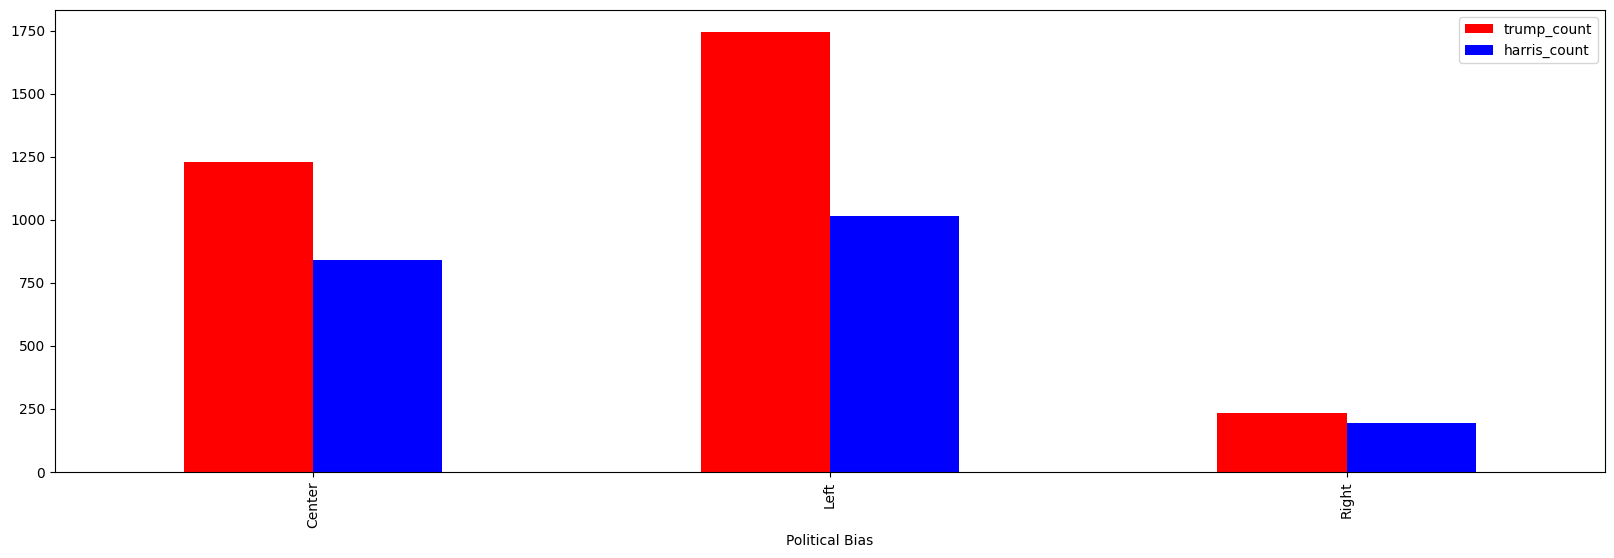

In [165]:
count.plot(kind='bar',xlabel='Political Bias',color=('r','b'))

In [166]:
date_count=news.groupby(['date'])[['trump_count','harris_count']].sum()
date_count=date_count.T
date_count['name']=['Trump','Harris']
date_count.set_index('name', inplace=True)

In [167]:
date_count

date,2024-08-26,2024-08-27,2024-08-28,2024-08-29,2024-08-30,2024-08-31,2024-09-01,2024-09-02,2024-09-03,2024-09-04,...,2024-09-29,2024-09-30,2024-10-01,2024-10-02,2024-10-03,2024-10-04,2024-10-05,2024-10-06,2024-10-07,2024-10-12
name,,,,,,,,,,,,,,,,,,,,,
Trump,25,25,0,45,55,0,1,2,67,52,...,20,74,254,261,67,119,38,10,53,31
Harris,2,27,0,55,41,7,1,17,14,13,...,13,37,138,121,42,60,63,1,38,26


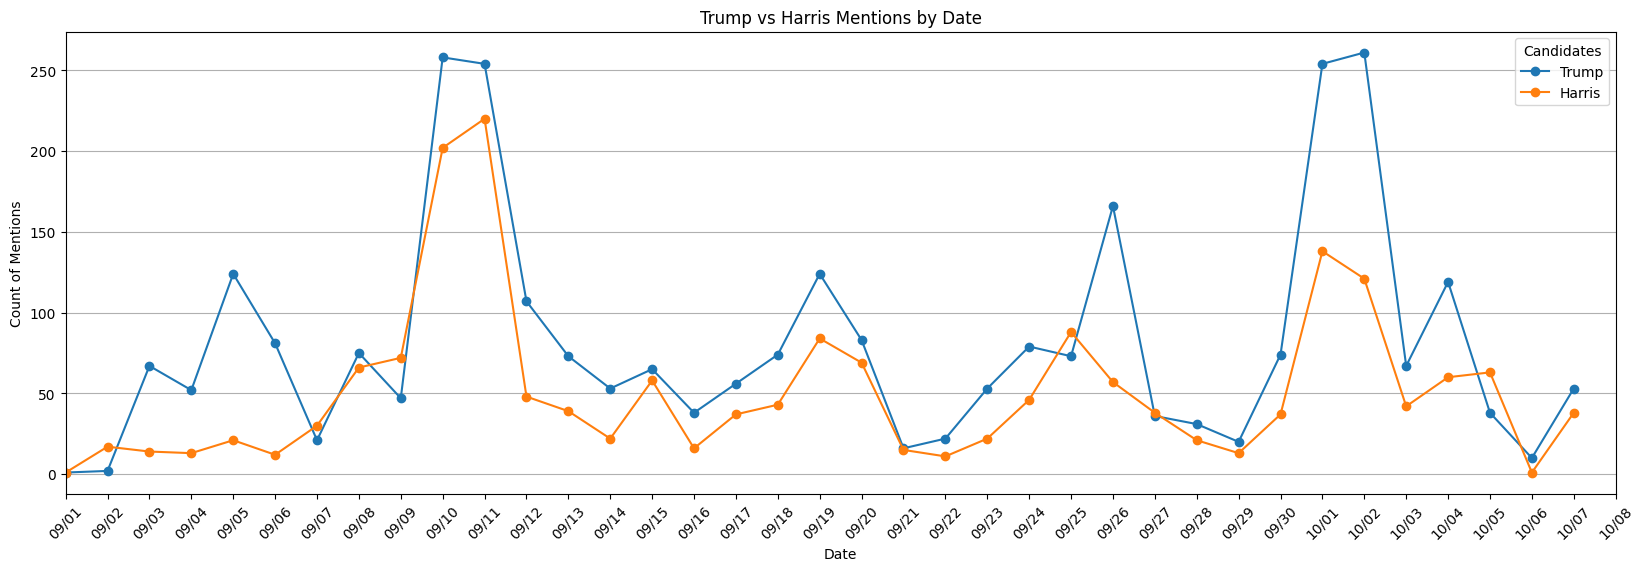

In [168]:
import matplotlib.pyplot as plt
import pandas as pd

date_count.columns = pd.to_datetime(date_count.columns, format='%m/%d')

date_range = pd.date_range(start='2024-09-01', end='2024-10-08')

%matplotlib inline
from IPython.core.pylabtools import figsize
figsize(20, 6)
date_count.T.reindex(date_range).plot(kind='line', marker='o')  # 선 그래프 그리기

plt.title('Trump vs Harris Mentions by Date')
plt.xlabel('Date')
plt.ylabel('Count of Mentions')

plt.xticks(ticks=date_range, labels=date_range.strftime('%m/%d'), rotation=45)

plt.grid(axis='y')
plt.legend(title='Candidates')

plt.show()  #

<Figure size 1200x600 with 0 Axes>

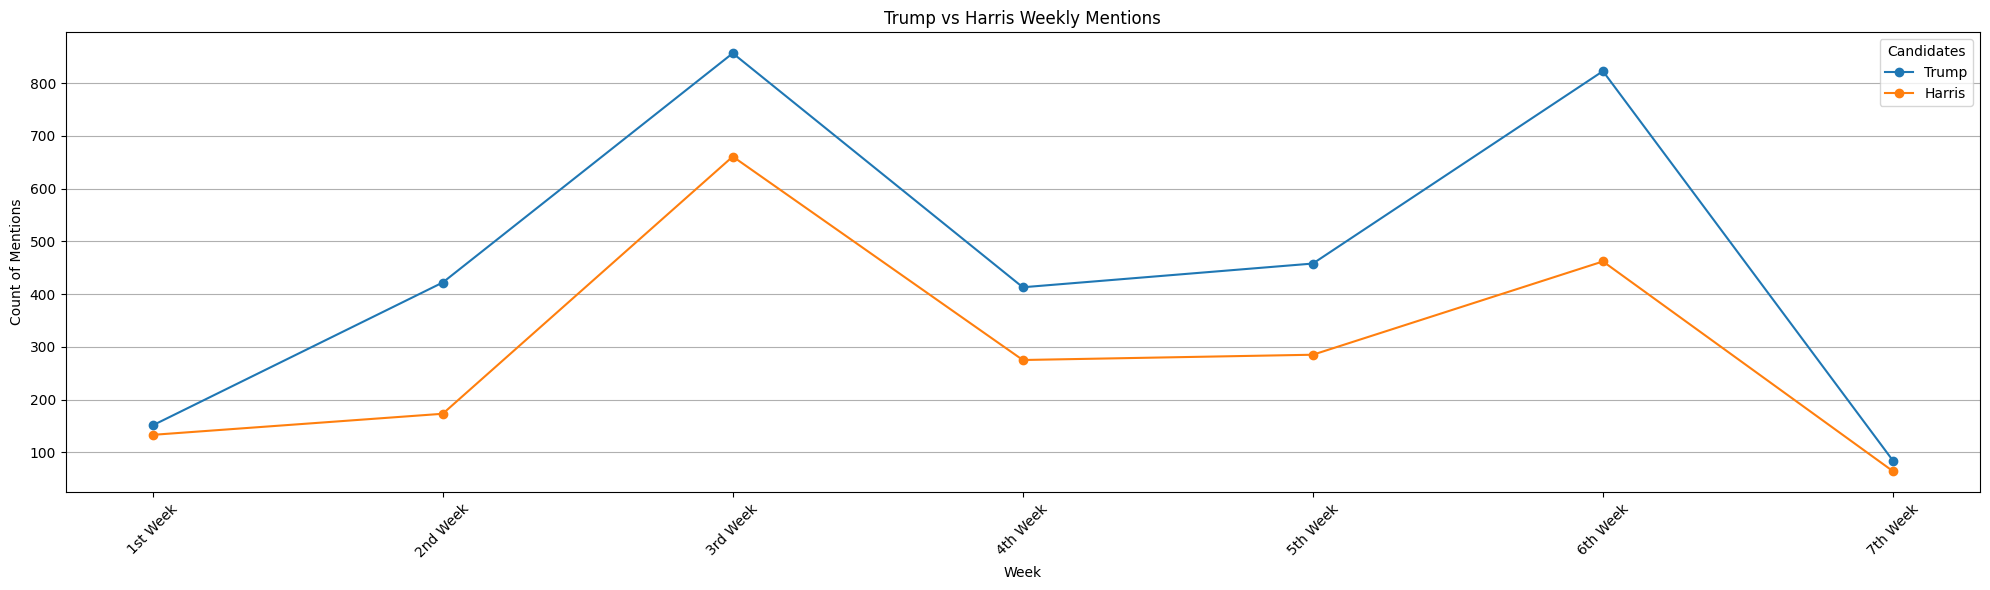

In [169]:
import matplotlib.pyplot as plt
import pandas as pd

date_count.columns = pd.to_datetime(date_count.columns, format='%Y-%m-%d')

date_count_weekly = date_count.T.resample('W').sum().T

weeks = [f"{i+1}st Week" if i == 0 else f"{i+1}nd Week" if i == 1 else f"{i+1}rd Week" if i == 2 else f"{i+1}th Week" for i in range(date_count_weekly.shape[1])]
date_count_weekly.columns = weeks

plt.figure(figsize=(12, 6))
date_count_weekly.T.plot(kind='line', marker='o')

plt.title('Trump vs Harris Weekly Mentions')
plt.xlabel('Week')
plt.ylabel('Count of Mentions')

plt.xticks(rotation=45)

plt.grid(axis='y')
plt.legend(title='Candidates')

plt.tight_layout()
plt.show()


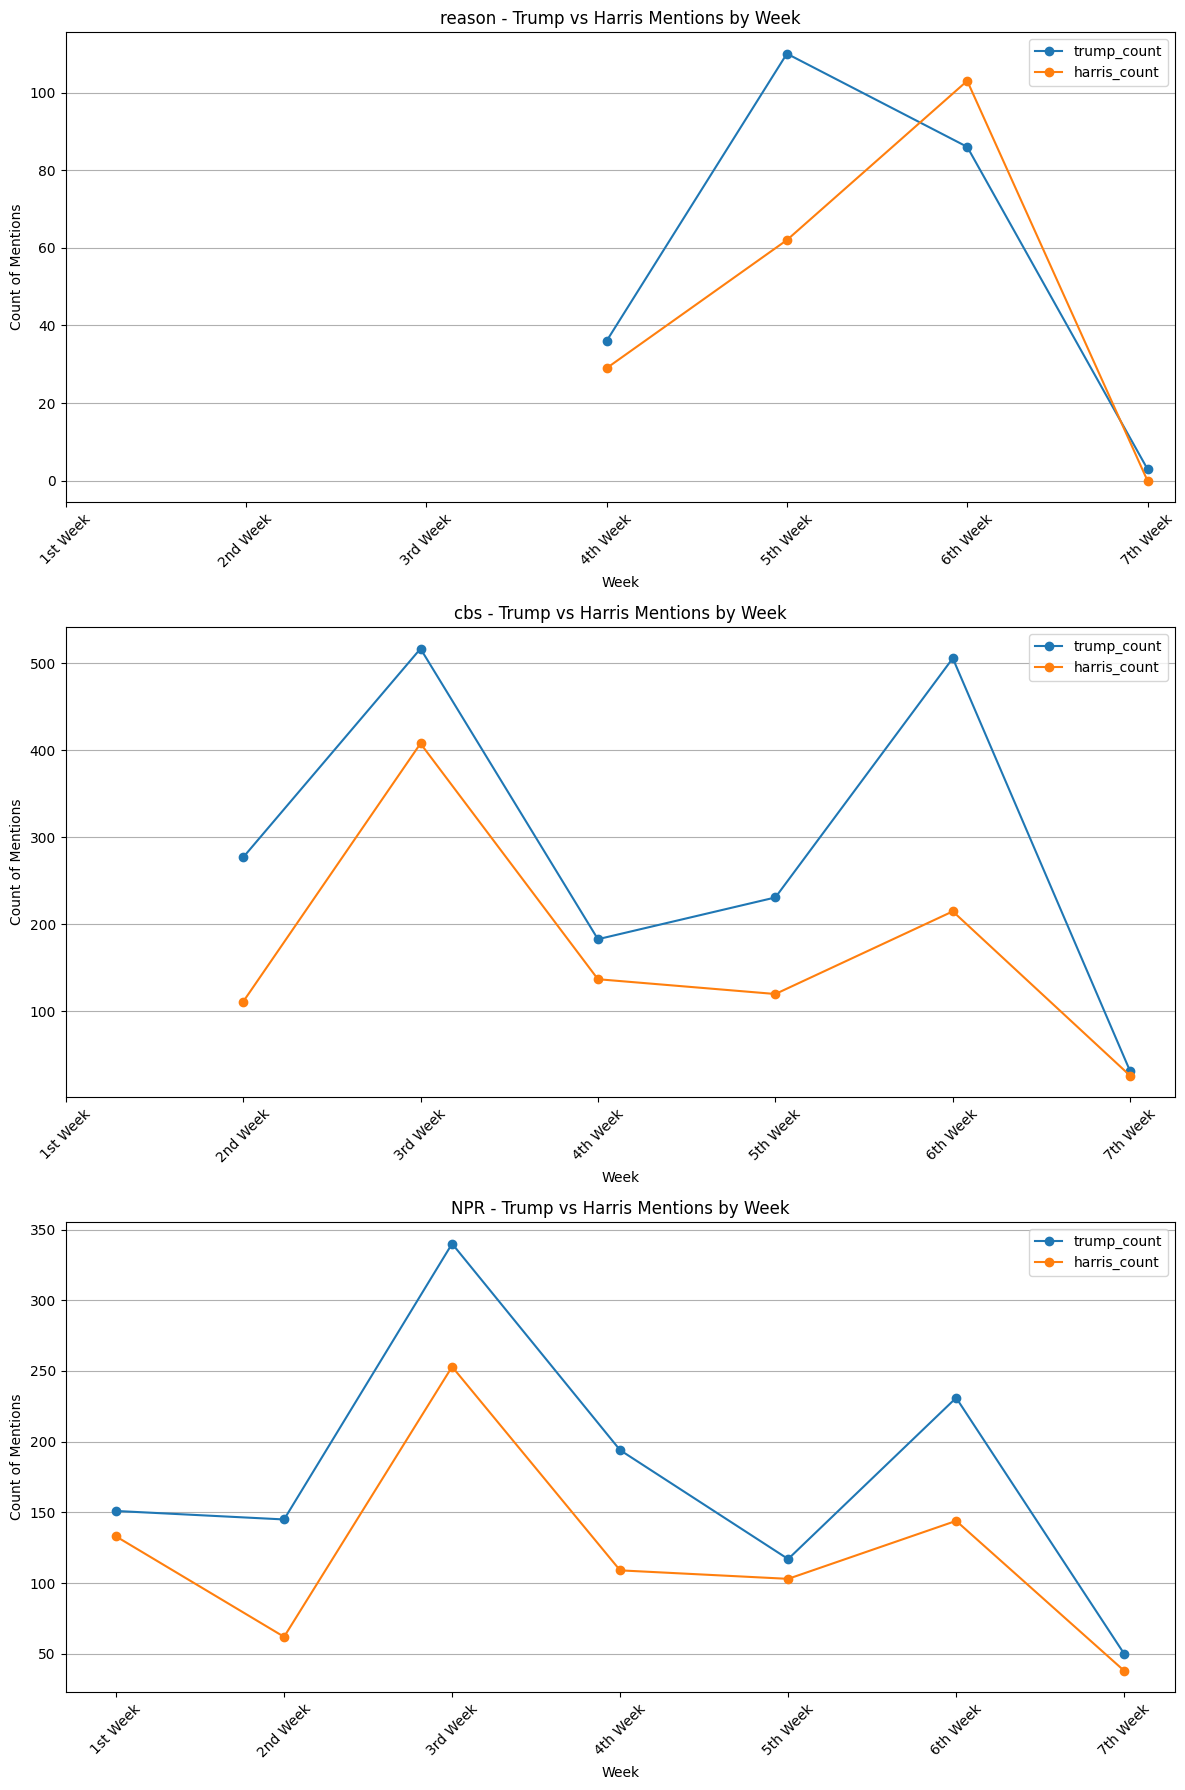

In [170]:
import matplotlib.pyplot as plt
import pandas as pd

news['date'] = pd.to_datetime(news['date'], format='%B %d, %Y')

weekly_press_counts = news.groupby([pd.Grouper(key='date', freq='W'), 'press'])[['trump_count', 'harris_count']].sum().unstack()

weeks = [f"{i+1}st Week" if i == 0 else f"{i+1}nd Week" if i == 1 else f"{i+1}rd Week" if i == 2 else f"{i+1}th Week" for i in range(weekly_press_counts.shape[0])]
weekly_press_counts.index = weeks

presses = news['press'].unique()


fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(12, 18))

for i, press in enumerate(presses):
    press_data = weekly_press_counts.xs(press, level='press', axis=1)

    press_data.plot(kind='line', marker='o', ax=axes[i])

    axes[i].set_title(f'{press} - Trump vs Harris Mentions by Week')
    axes[i].set_xlabel('Week')
    axes[i].set_ylabel('Count of Mentions')
    axes[i].grid(axis='y')
    axes[i].set_xticks(range(len(weeks)))
    axes[i].set_xticklabels(weeks, rotation=45)

plt.tight_layout()
plt.show()

In [171]:
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd

vectorizer = CountVectorizer(stop_words='english')
X = vectorizer.fit_transform(news['text'].fillna(''))

word_counts = X.toarray().sum(axis=0)

words = vectorizer.get_feature_names_out()

word_freq = pd.DataFrame({'word': words, 'count': word_counts})

top_10_words = word_freq.sort_values(by='count', ascending=False).head(10)

print(top_10_words)

            word  count
14145      trump   3189
12033       said   2435
6433      harris   2037
10619  president   1590
4708    election   1061
13071      state    906
2198    campaign    855
3669      debate    780
10101     people    770
1714       biden    761


In [172]:
import nltk
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [184]:
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet
from nltk import pos_tag
from nltk.tokenize import word_tokenize

def get_wordnet_pos(treebank_tag):
    if treebank_tag.startswith('J'):
        return wordnet.ADJ
    elif treebank_tag.startswith('V'):
        return wordnet.VERB
    elif treebank_tag.startswith('N'):
        return wordnet.NOUN
    elif treebank_tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN

lemmatizer = WordNetLemmatizer()

def preprocess(text):
    words = word_tokenize(text.lower())
    pos_tagged_words = pos_tag(words)
    lemmatized_words = [lemmatizer.lemmatize(word, get_wordnet_pos(pos)) for word, pos in pos_tagged_words if word.isalpha() and word not in stop_words]
    return ' '.join(lemmatized_words)

news['processed_text'] = news['text'].fillna('').apply(preprocess)

custom_stop_words = ['trump', 'harris','say','would','make','also']

vectorizer = CountVectorizer(stop_words=custom_stop_words)

X = vectorizer.fit_transform(news['processed_text'])

word_counts = X.toarray().sum(axis=0)

words = vectorizer.get_feature_names_out()

word_freq = pd.DataFrame({'word': words, 'count': word_counts})
top_10_words = word_freq.sort_values(by='count', ascending=False).head(10)

In [185]:
top_10_words

,word,count
7820,president,1591
9579,state,1382
3193,election,1195
1359,campaign,937
10912,voter,866
10910,vote,841
2447,debate,798
7456,people,757
11230,year,753
8482,republican,701


In [177]:
!pip install squarify

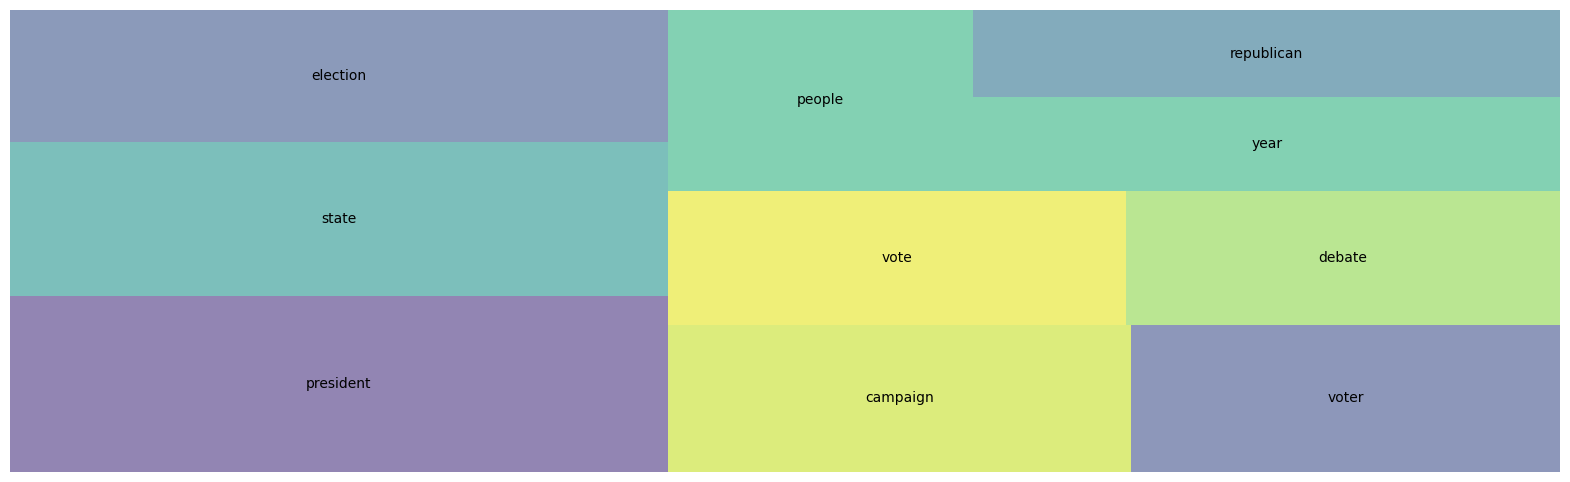

In [186]:
import squarify

squarify.plot(sizes=top_10_words['count'], label=top_10_words['word'],alpha=0.59)
plt.axis('off')
plt.savefig('ww.jpg')
plt.show();

In [200]:
def preprocess_text(text):
    if pd.isnull(text):
        return ''

    text = re.sub(r'[^a-zA-Z\s]', '', text)

    words = word_tokenize(text.lower())
    pos_tagged_words = pos_tag(words)
    lemmatized_words = [lemmatizer.lemmatize(word, get_wordnet_pos(pos)) for word, pos in pos_tagged_words if word.isalpha() and word not in stop_words]
    return ' '.join(lemmatized_words)


news['cleaned_text'] = news['text'].apply(preprocess_text)

custom_stop_words = ['trump', 'harris','say','would','make','also','cbs','go']
vectorizer = CountVectorizer(stop_words=custom_stop_words)

bias_word_counts = {}

for bias in news['bias'].unique():
    filtered_text = news[news['bias'] == bias]['cleaned_text']
    X = vectorizer.fit_transform(filtered_text)
    word_counts = X.toarray().sum(axis=0)
    words = vectorizer.get_feature_names_out()

    bias_word_counts[bias] = pd.DataFrame({'word': words, 'count': word_counts})


for bias, df in bias_word_counts.items():
    print(f"Top words for bias '{bias}':")
    top_words = df.sort_values(by='count', ascending=False).head(10)
    print(top_words)
    print("\n")

Top words for bias 'Right':
           word  count
3522        new     94
4070  president     92
3841     people     91
5924       year     91
5669      vance     91
224    american     89
3659        one     88
3972     policy     84
736    campaign     68
3061       like     67


Top words for bias 'Left':
             word  count
7230    president    880
8924        state    614
6182         news    505
2954     election    489
1240     campaign    465
2298       debate    429
3666       former    391
10202        vote    388
8023        right    373
7869   republican    360


Top words for bias 'Center':
            word  count
7045       state    695
2303    election    668
5746   president    604
8073       voter    498
8066        vote    446
952     campaign    396
8343        year    355
5456      people    340
1764      debate    327
6240  republican    319


